# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [3]:
#function that retruns the star formation rate, given the lumniostiy of the galaxy.

def StarFormationRate(L,Type,TIR=0):
    '''Comuputes the star formation rate of a galaxy following Kennicutt and evans 2020 eq12
    Inputs:
        L= luminosty of the galaxy in erg/s
        Type= string that lists the wavelength : FUV, NUV, TIR , Halpha
        TIR = Total infrared Luminostiy (default=0)
    Returns:
        Log of the Star formation rate (MSun/Year)'''
    
    if (Type == "FUV"):
        logCx=43.35 # Calibration from L to SFR from table 1 (K&E2012)
        TIRc= 0.46 #correction for dust absorbtion from table 2
    elif (Type=="NUV"):
        logCx=43.17
        TIRc=0.27
    elif (Type =="Halpha"):
        logCx=41.27
        TIRc=0.0024
    elif (Type == "TIR"):
        logCx=43.41
        TIRc=0
    else:
        print("Missing wavelength:FUV, NUV, Halpha, TIR")

    #correct the luminosity for dust 
    Lnew = L + TIRc*TIR
    
    return np.log10(Lnew) - logCx


Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [7]:
LsunErgS = const.L_sun.to(u.erg/u.s).value

In [9]:
#  WLM Dwarf Irregular Galaxy
#Lee et al. 2009 WLM galaxy Log(SFR) derived from UV is -2.21 --> Galex
#from NED : WLM NUV luminosity (Galex) 1.71e7 Lsun
#from Ned : WLM NIR luminosity  (IRAC) 2.48e6 Lsun

NUV_WLM = 1.71e7*LsunErgS
TIR_WLM = 2.48e6*LsunErgS

StarFormationRate(NUV_WLM, 'NUV', TIR_WLM)

-2.3373504191027266

In [11]:
#  N24 Sc galaxy
#Lee et all. 2009 NGC 24 log(SFR) derived from UV as -0.7
#From NED: NGC 24 NUV luminosity (Galex) is 2.96e8 Lsun
#From NED: NGC 24 FIR luminosyt (NIPS) 3.09e8 Lsun
#From NEd: NGC 24 NIR lumonosity (2MASS) 8.34e8 Lsun

NUV_N24 = 2.96e8*LsunErgS
TIR_N24 = 3.09e8*LsunErgS + 8.34e8*LsunErgS

StarFormationRate(NUV_N24, 'NUV', TIR_N24)

-0.8055527449424105

# Part B Star formation main sequence

Write a function that returns the average SFR of a galaxy at a given redshift. 

What is the average SFR of a MW mass galaxy today? at z=1?

Plot the SFR main sequence for a few different redshifts.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

In [14]:
#create a function that returns the SFR main sequence 

def SFRMainSequence(Mstar,z):
    '''Averge SFR of a galaxy as a function of stellar mass and redshift
    input:
        z= redshift
        Mstar= stellar mass of the galaxy in Msun
    Returns:
        log(SFR (Msun/year))'''
    
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2
    
    return alpha*(np.log10(Mstar)-10.5)+beta

In [15]:
# MW at z=0

10**SFRMainSequence(6e10,0)
#actual star formation rate of the MW is only 1Msun/year

3.7558295562247412

In [18]:
# MW at z = 1
10**SFRMainSequence(6e10,1)

30.799680595160783

In [19]:
# create an array of stellar masses
Mass = np.linspace(1e9, 1e12)

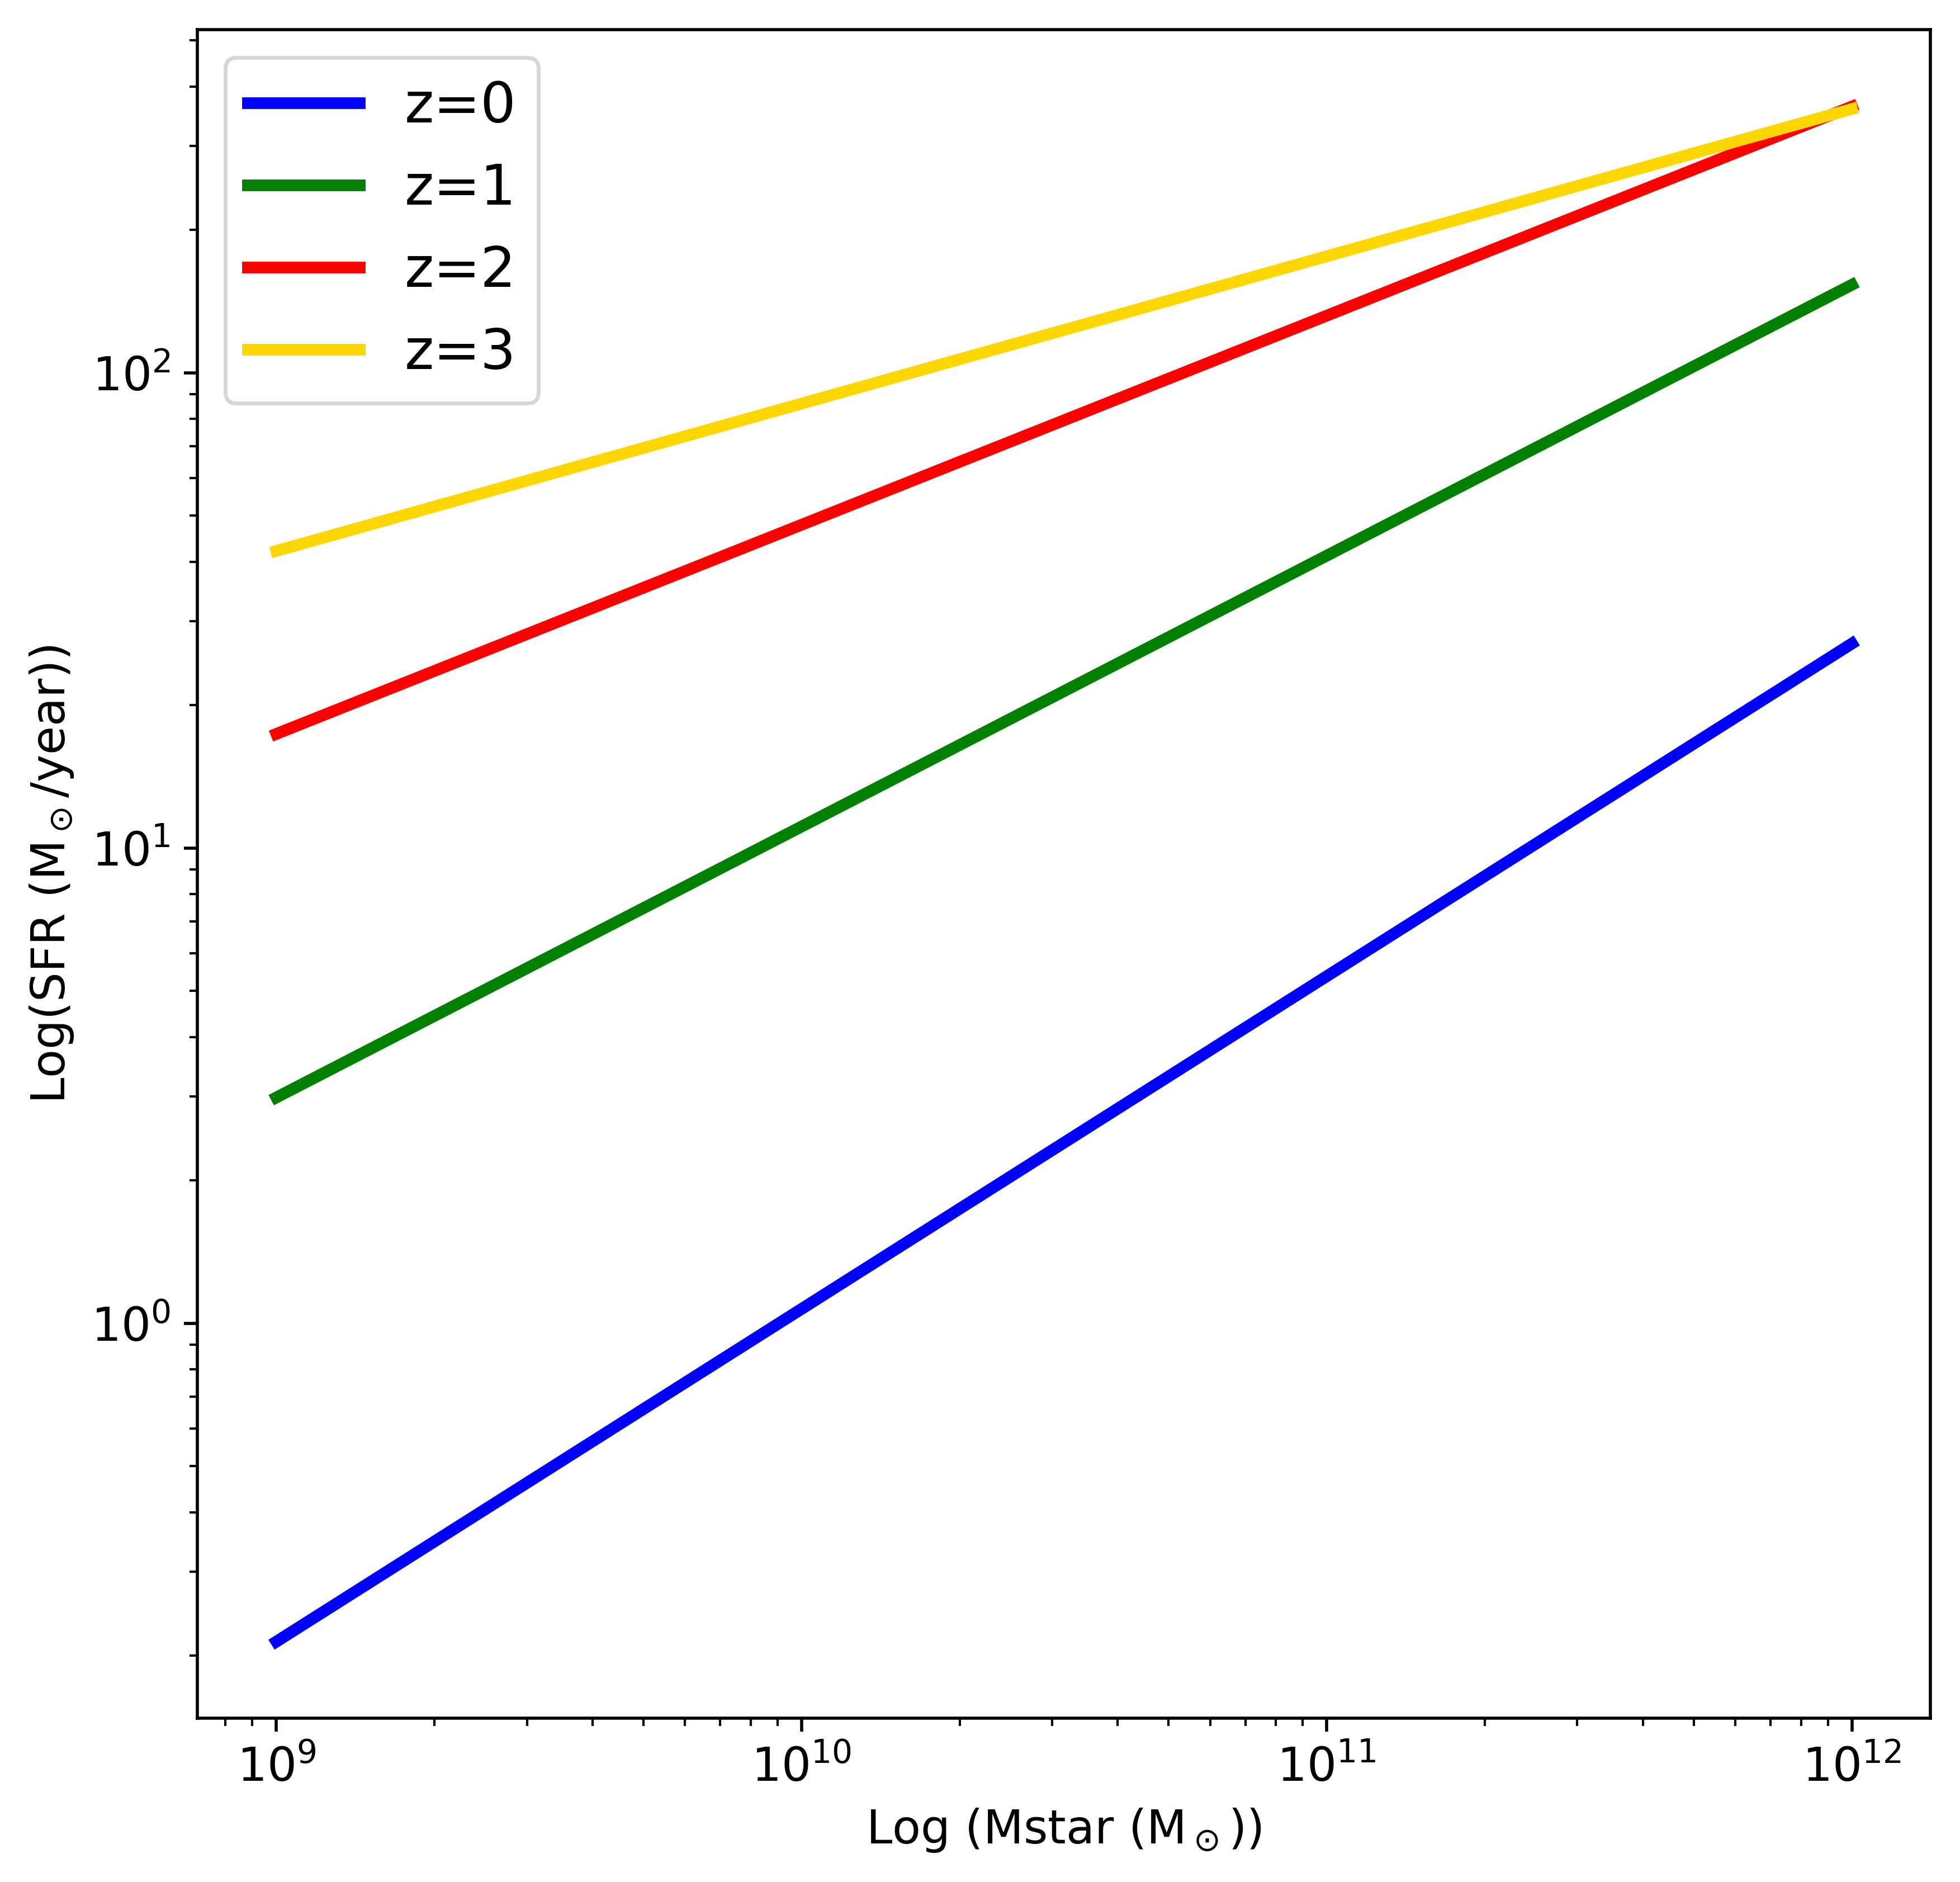

In [22]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMainSequence(Mass,0), color='blue', linewidth=3, label='z=0')
plt.loglog(Mass, 10**SFRMainSequence(Mass,1), color='green', linewidth=3, label='z=1')
plt.loglog(Mass, 10**SFRMainSequence(Mass,2), color='red', linewidth=3, label='z=2')
plt.loglog(Mass, 10**SFRMainSequence(Mass,3), color='gold', linewidth=3, label='z=3')
# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

What are the star formation rates for :

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [ ]:
# normal galaxies 


In [ ]:
# LIRGs  


In [ ]:
# ULIRGs

In [ ]:
# HLIRGs